## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from sklearn.model_selection import train_test_split

In [2]:
filenames = os.listdir('/kaggle/input/cifar-10object-recognition/cifar-10/train')

In [3]:
type(filenames)

list

In [4]:
len(filenames)

50000

In [5]:
print(filenames[:5])
print(filenames[-5:])

['27147.png', '32352.png', '41695.png', '21130.png', '36145.png']
['48768.png', '37246.png', '23121.png', '36054.png', '4164.png']


## Labels Processing

In [6]:
labels_df = pd.read_csv('/kaggle/input/cifar-10object-recognition/cifar-10/trainLabels.csv')

In [7]:
labels_df.shape

(50000, 2)

In [8]:
labels_df.head(5)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [9]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [10]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [11]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [12]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [13]:
labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

In [14]:
labels = [labels_dictionary[i] for i in labels_df['label']]

In [15]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


### Displaying Sample Image

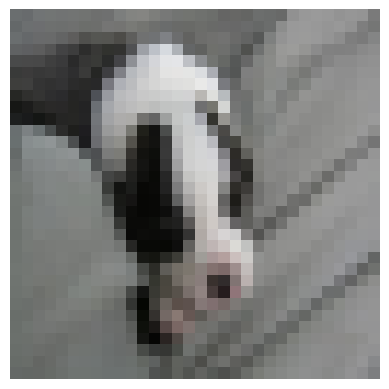

In [16]:
import cv2

# Read image
img = cv2.imread('/kaggle/input/cifar-10object-recognition/cifar-10/train/45888.png')
# Convert from BGR (OpenCV default) → RGB (for correct colors)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [18]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
id_list=list(labels_df['id'])

In [20]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


****Image Processing****

In [21]:
# convert images to numpy arrays

train_data_folder = '/kaggle/input/cifar-10object-recognition/cifar-10/train/'

data=[]
 
for id in id_list:
    image=Image.open(train_data_folder + str(id) + '.png')
    image=np.array(image)
    data.append(image)

In [22]:
type(data)

list

In [23]:
len(data)

50000

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(32, 32, 3)

In [27]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [28]:
# Covert image list and label list to numpy arrays
X=np.array(data)
y=np.array(labels)

In [29]:
type(X)

numpy.ndarray

In [30]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


****Train Test Split****

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


****Scaling the data****

In [33]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [34]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [35]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

## Building the Neural Network

In [36]:
import tensorflow as tf
from tensorflow import keras

2025-10-25 22:42:24.060772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761432144.276103     216 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761432144.342975     216 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [40]:
num_of_classes =10

# Setting up the layers of NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])


I0000 00:00:1761432311.587576     216 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761432311.588360     216 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [43]:
# Compile the NN
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
# Training the NN
model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10


I0000 00:00:1761432368.044412     285 service.cc:148] XLA service 0x7df450006e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761432368.045296     285 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761432368.045316     285 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761432368.234913     285 cuda_dnn.cc:529] Loaded cuDNN version 90300


  66/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1193 - loss: 2.4613

I0000 00:00:1761432369.098681     285 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2044 - loss: 2.1495 - val_accuracy: 0.2820 - val_loss: 1.9256
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2743 - loss: 1.9361 - val_accuracy: 0.2878 - val_loss: 1.9014
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2843 - loss: 1.9174 - val_accuracy: 0.3010 - val_loss: 1.8960
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2991 - loss: 1.9071 - val_accuracy: 0.3035 - val_loss: 1.8904
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3084 - loss: 1.8790 - val_accuracy: 0.3260 - val_loss: 1.8405
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3248 - loss: 1.8551 - val_accuracy: 0.3217 - val_loss: 1.8554
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3309 - loss: 1.8467 - val_accuracy: 0.3313 - val_loss: 1.8295
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3305 - loss: 1.8463 - val_accurac

## Resnet-50

In [45]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [46]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [47]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [50]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 486s 381ms/step - accuracy: 0.3167 - loss: 2.0510 - val_accuracy: 0.7440 - val_loss: 0.9668
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 431s 383ms/step - accuracy: 0.6615 - loss: 1.1139 - val_accuracy: 0.8935 - val_loss: 0.4882
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 430s 382ms/step - accuracy: 0.7916 - loss: 0.7837 - val_accuracy: 0.9090 - val_loss: 0.3548
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 430s 382ms/step - accuracy: 0.8628 - loss: 0.5887 - val_accuracy: 0.9287 - val_loss: 0.2885
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 431s 383ms/step - accuracy: 0.9065 - loss: 0.4611 - val_accuracy: 0.9365 - val_loss: 0.2571
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 430s 382ms/step - accuracy: 0.9373 - loss: 0.3517 - val_accuracy: 0.9395 - val_loss: 0.2390
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 430s 382ms/step - accuracy: 0.9534 - loss: 0.2868 - val_accuracy: 0.9390 - val_loss: 0.2207
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 430s 382ms/step - ac

In [53]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 121ms/step - accuracy: 0.9362 - loss: 0.2422
Test Accuracy = 0.9383999705314636


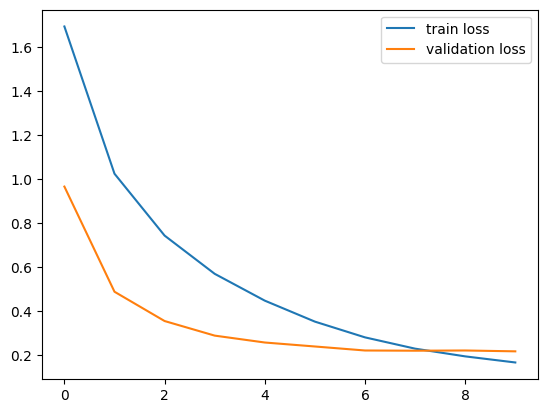

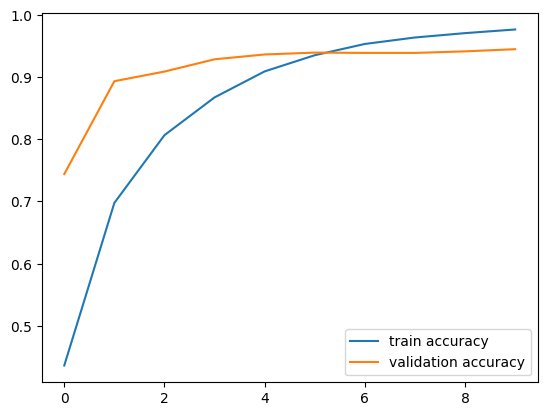

In [55]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [56]:
model.save('/kaggle/working/cifar10_trained_model.h5')